<a href="https://colab.research.google.com/github/Zielk123/Eksamener-002/blob/main/Kopi_af_Eksamen_AM_21_s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Eksamen: Anvendt Matematik

Opgaven har 2 dele. Lineær algebra og calculus.


#### Rules of the game:

- Don't panic! - Hvis koden ikke virker (men virkede før). Gå tilbage, og kør oppefra ned. Også en god ide at tjekke, at koden er fejlfri ved at gøre denne øvelse undervejs.
- De fleste kodefejl er dumme stavefejl. Vær omhyggelig med kommaer, punkter etc.
- Hvis der er noget, som slet ikke kan løses, så kan du bare kommentere ud med `#`
- Brug objektnavne, der blev defineret i opgaven
- Der afleveres som 👉 `ipynb` (**ikke PDF!**)

In [250]:
# importer pakker
import sympy as sp
from sympy import *
import numpy as np
np.set_printoptions(suppress=True)
from scipy import linalg
import matplotlib
import matplotlib.pyplot as plt


## Del 1: Lineær Algebra - Ninja Grind

![](https://source.unsplash.com/X4RJG4aNi8o)

Den lokale manager for kaffekæden "Ninja Grind" vil gerne finde ud af hvor mange glas/krus Latte og Luksus-Cappuccino der skal produceres hver dag givet de standard-leveringer af mælk og espressobønner, som kan garanteres pt.

Der er ansat en fultids-barista (8 timer/dag).
Der kan bruges 14.4 liter mælk og 3 liter espresso om dagen.

#### Priser:
- Latte: 43dkk
- Luksus cappuccino: 54DKK

#### Fordeling af inputs:

1.   Espresso:
    *  43 ml / latte
    *  86 ml / luksus cappuccino
2.   Mælk:
    *  292 ml / latte
    *  333 ml / luksus cappuccino
3.   Barista arbejde:
    *  0.08 timer / latte
    *  0.12 timer / luksus cappuccino




  c = cappucino
  l = Latte


In [251]:
# 1.1
# Opstil ligninger, som beskriver vores optimeringsproblem i SymPy
# Brug symboler l (latte) og c (cappuccino)

# definer symboler
c, l = symbols('c l')

# definer ligninger
eq1 = Eq(43*l + 86*c, 3000) #Espresso
eq2 = Eq(292*l + 333*c, 14000) #Mælk 
eq3 = Eq(0.08*l + 0.12*c, 8) #Arbejdstimer

In [252]:
# print de 3 ligninger (1 cell / ligning)
eq1
print(eq1)

Eq(86*c + 43*l, 3000)


In [253]:
eq2
print(eq2)

Eq(333*c + 292*l, 14000)


In [254]:
eq3
print(eq3)

Eq(0.12*c + 0.08*l, 8)


In [255]:
# 1.2.1 - Grafisk løsning
# plot de 3 funktioner med Latte på x-aksen og Cappuccino på y-aksen

# Brug np.linspace til at generere 100 værdier mellem 0 og 100 som l_plot

l_plot = np.linspace(0, 100, num=100)

# obskriv ligninger til at beregne c-værdier(c_plot_1, c_plot_2, c_plot_3)
c_plot_1=(-0.5*l_plot)+34.88
c_plot_2=(-0.88*l_plot)+43.04
c_plot_3=(-0.67*l_plot)+69.36
# (rundet til 2 decimaler)

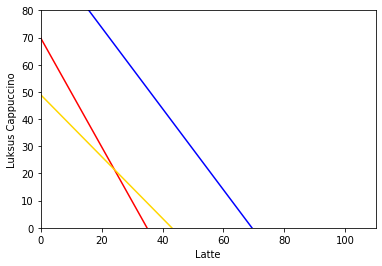

In [256]:
# 1.2.2
# Plot, Espresso (red), Mælk (gold), Arbejde (blue)
c=plt.axis([0, 110, 0, 80])
plt.xlabel('Latte')
plt.ylabel('Luksus Cappuccino')

c_plot_1=(-0.5*l_plot)+34.88
c_plot_2=(-0.88*l_plot)+43.04
c_plot_3=(-0.67*l_plot)+69.36

plt.plot(c_plot_1, l_plot, color='red')
plt.plot(c_plot_2, l_plot, color='gold')
plt.plot(c_plot_3, l_plot, color='blue')

Hvor mange Latte / Cappuccino skal der produceres ved optimal udnyttelse af ingredienser (ikke præcise tal)? (1 svar)


1.   30 latte / 19 cappuccino
2.   ~23 af hver
3.   50 latte / 30 cappuccino



In [257]:
# 1.2.3
# Skriv dit svar som tal her f.eks s1 = 5
s1 = 2

Hvad kan man sige om arbejdstimernes "rolle" i denne kontekst - dvs. ikke teoretisk men givet vores espresso og mælke forsyning? (1 svar)

1.   Hvis der var flere arbejdstimer, kunne der produceres mere.
2.   Vores barista kan lave omkring 100 latte og næsten 70 cappuccino om dagen.
3.   Baristaen har mere end nok tid til at producere den optimale mængde af latte og cappuccino givet de ingredienser som der er til rådighed.


In [258]:
# 1.2.4
# Skriv dit svar som tal her
s2 = 3

#### Rækkeoperationer
I denne opgave skal du bruge rækkeoperationer til at finde løsningen.

1.   Du skal først definere en augmenteret matrix som np.array der repræsenterer de første 2 ligninger (mælk og espresso). 
2.   Derefter skal du bruge rækkeoperationer (kode!!!) for at omskrive til reduceret trappeform (reduceret række-echelon form).

f.eks.: `augmented[0] = augmented[0]/augmented[0,0]`

Til sidst har din matrix denne form: 

$$\left[\begin{array}{rr|r}
1 & 0 & ? \\ 
0 & 1 & ?
\end{array}\right]$$

3. Her vil du kunne aflæse resultatet i søjlevektoren på højre sidde.



In [270]:
# 1.3.1

## definer augmenteret matrix

augmented=np.asarray([
                         [86, 43, 3000],
                         [333, 292, 14000]
])




In [260]:
# 1.3.2

# Brug rækkeoperationer (så mange som du har brug for) for at omskrive til reduceret trappeform
# Her er den første operation, som du kan bruge
augmented[0] = augmented[0]/augmented[0,0]

In [271]:
# OBS: Det er en god ide at tjekke din matrix undervejs - du kan tilføje en celle, vise matrix 
# (bare skriv "augmented" og udfør og slette igen...)

augmented

array([[   86,    43,  3000],
       [  333,   292, 14000]])

In [272]:
augmented[0]=augmented[0]*333
augmented[1]=augmented[1]*86
augmented

array([[  28638,   14319,  999000],
       [  28638,   25112, 1204000]])

In [273]:
augmented[1]=augmented[1]-augmented[0]
augmented

array([[ 28638,  14319, 999000],
       [     0,  10793, 205000]])

In [274]:
augmented_1=augmented[[1,0],:]
augmented_1

array([[     0,  10793, 205000],
       [ 28638,  14319, 999000]])

In [275]:
augmented_1[1]=augmented_1[1]-augmented_1[0]


In [276]:
augmented_1

array([[     0,  10793, 205000],
       [ 28638,   3526, 794000]])

In [277]:
augmented_1[1]=augmented_1[1]/2
augmented_1

array([[     0,  10793, 205000],
       [ 14319,   1763, 397000]])

In [278]:
augmented_1[0]=augmented_1[0]/10793
augmented_1

array([[     0,      1,     18],
       [ 14319,   1763, 397000]])

In [279]:
augmented_1[0]=augmented_1[0]*1763
augmented_1

array([[     0,   1763,  31734],
       [ 14319,   1763, 397000]])

In [280]:
augmented_1[1]=augmented_1[1]-augmented_1[0]
augmented_1

array([[     0,   1763,  31734],
       [ 14319,      0, 365266]])

In [281]:
augmented_1[0]=augmented_1[0]/1763
augmented_1[1]=augmented_1[1]/14319
augmented_1

array([[ 0,  1, 18],
       [ 1,  0, 25]])

In [282]:
# print den færdige matrix i reduceret række-echelon form
augmented_1

array([[ 0,  1, 18],
       [ 1,  0, 25]])

#### Løsning af matrixligningen

Vi kan finde en løsning til vores ligningssystem ved at løse matrixligningen $A\vec{x} = \vec{b}$
Opgaven er mere frit og du skal vise, at du selv kan udføre alle trin.
Du skal finde løsningen "manuelt" dvs. ikke ved at bruge `scipy.linalg.solve` eller sympy. Du må dog gerne bruge det for at tjekke, om dine beregninger passer...


Du skal bruge følgende python objekter:


*   $A$: `matrix_a`
*   $A^{-1}$: `matrix_a_inv`
*   $\vec{b}$: `vector_b`
* $\vec{x}$: `vector_x`



In [300]:
# 1.4.1

# definer matrix A
matrix_a = np.asarray([[43, 86,], [ 292, 333]])

# definer vector b
vector_b = np.array([ 3000, 14000])

In [296]:
matrix_a

array([[ 43,  86],
       [292, 333]])

In [301]:
vector_b

array([ 3000, 14000])

In [299]:
# beregn A^-1
matrix_a_inv = np.linalg.inv(matrix_a)
print(matrix_a_inv)

[[-0.03085333  0.00796813]
 [ 0.02705457 -0.00398406]]


In [ ]:
# 1.4.2
# beregn vector_x
vector_x = 
print(vector_x)

In [ ]:
# 1.5: Beregn de daglige indtægter ved optimal produktion
# husk at runde ned

qLatte =
qCappuccino =

result = 

print("vores indtægter per dag ved optimal produktion er DKK", result)

In [ ]:
# 1.6: Beregn hvor meget tid baristaen bruger på at lave 
# Latte og Luksus Cappuccino ved optimal produktion
# husk at runde ned

time = 
print(time)

## Indsutri og profitmaksimering

![](https://source.unsplash.com/SLIFI67jv5k)

En mindre Nordjysk virksomhed producerer komponenter til landbrugsmaskiner og vil gerne se, om de muligvis skal justere deres daglige produktionskapacitet. 
$q$ er mængden af disse komponenter, $p$ en angivet i kr. pr. enhed.

* Deres omkostningsfunktion er:
$C(q) = 4000-25q+0.05q^{2}+0.000067q^{3}$
* Efterspørgslen er givet som:
$p(q) = 320+0.017q-0.0008q^{2}$ dvs. prisen er ikke konstant men ændrer sig (lidt) med ændringer af $q$


In [302]:
# 2.1 Definer symboler p, q og h

p, q, h = symbols('p, q, h')

In [336]:
# opstil ligninger for omkostinger og efterspørgsel

C_q = 4000 - 25*q + (0.5*q**2) + (0.000067*q**3)

p_q = 320+(0.017*q)-(0.0008*q**2)

In [337]:
# print
C_q

6.7e-5*q**3 + 0.5*q**2 - 25*q + 4000

In [313]:
p_q

-0.0008*q**2 + 0.017*q + 320

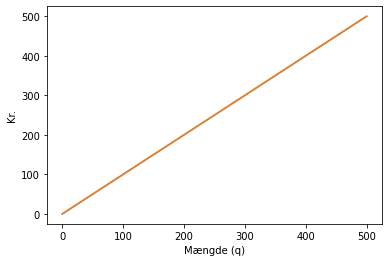

In [367]:
# 2.2 plot C(q)

# definer 200 punkter mellem 0 og 500 med np.linspace i objektet q_plot

q_plot = np.linspace(0, 500, num=200)
C_q = 4000 - 25*q + (0.5*q**2) + (0.000067*q**3)
C_q_plot =np.linspace(0, 500, num=200)
# beregn tilsvarende p-værdier og plot

p_plot_1 = np.linspace(0, 500, num=200)

plt.xlabel('Mængde (q)')
plt.ylabel('Kr.')

plt.plot(C_q_plot , q_plot)

plt.plot(p_plot_1, q_plot)


#### 2.3 Beregn minimum for $C(q)$

* beregning skal foretages "manuelt" hvor du først skal finde $C'(q)$ ved at beregne $\lim_{h \to 0} \frac{f(x + h) - f(x)}{h}$, hvor $C(q)$ indsættes for $f(x)$ dvs. $\lim_{h \to 0} \frac{C(q + h) - C(q)}{h}$
*$h$ blev allerede oprettet som Sympy sybol

In [374]:
import sympy 

In [379]:
# 2.3.1
# definer C(q+h)
C_q_h = C_q+(C_q-(4000 - 25*q + (0.5*q**2) + (0.000067*q**3))*h)

In [382]:
# 2.3.2
# beregn grænseværdi

C_lim = limit((C_q_h-C_q)/h, h, 0)

In [383]:
# du kan tjekke, om grænseværdien er lige 
C_lim

oo*sign(6.7e-5*q**3 + 0.5*q**2 - 25*q + 4000)

In [384]:
# med den (automatisk) afledede funktion (sympy diff) for at være sikker...
diff(C_q)

0.000201*q**2 + 1.0*q - 25

In [ ]:
# 2.3.3
# brug Sympy solve til a finde q, hvor C minimeres
solutions = solve(...)
print(solutions)

#### 2.4 Profitmaksimering

Derudover ved vi (f.eks. fra mikroøkonomi):

* Indtægter: $R(q) = p(q) · q$
* Profit: $P(q) = R(q) - C(q)$

* Marginalomkostninger $MC = C'(q)$ (omkostninger ved at producere +1 enhed)
* Marginalindtægter $MR = R'(q)$ (indtægter ved at sælge +1 enhed)
* Marginalprofit $MP = P'(q)$ (profit ved at sælge +1 enhed - de omkostninger  forbundet med produktion af +1 enhed)

In [ ]:
# 2.4.1
# Definer funktiner for indtægter R(q) og profit P(q)

R_q = ...
P_q = ...

print(expand(R_q)) # her hjælper expand med læsbarheden...
print(expand(P_q)) # her hjælper expand med læsbarheden...

In [ ]:
# 2.4.2
# Definer (ved at differentere) MC, MR og MP (brug sympy til det.)

MC = ...
MR = ...
MP = ...

# du kan printe disse ligninger og og copy-paste dem i den næste opgave (husk at erstætte q med q_plot)
print(MC)
print(expand(MR)) # her hjælper expand med læsbarheden...
print(expand(MP)) # her hjælper expand med læsbarheden...

Vi antager, vores virksomhed har monopol på disse komponenter og dermed kan der profitmaksimeres ved at sætte $MC = MR$

Vis, at mængden $q$ ved $MC = MR$ er den samme som den, hvor profit $P$ maksimeres, dvs. $MP = 0$

In [ ]:
# 2.4.3
# Plot MC (red) og MR (gold)
# du kan genbruge q_plot værdier fra sidste plot

plt.xlabel('Mængde (q)')
plt.ylabel('Kr.')

#beregn p_værdier
p_plot_2 = ...
p_plot_3 = ...


plt.plot(...) # MC
plt.plot(...) # MR

In [ ]:
# 2.4.4
# Definer MC = p og MR = p som Sympy ligninger
# p er allerede defineret som symbol (tidligere)

MC_eq = Eq(...,...)
MR_eq = ...

In [ ]:
# brug sympy solve til at finde løsninger for MC = MR
solve([...,...])

In [ ]:
q_monopoly = ... # copy-paste den realistiske q-værdi

In [ ]:
# 2.4.5
# beregn max-værdien for profit-funktionen

solve(...)